<a href="https://colab.research.google.com/github/jdansb/jdansb.github.io/blob/main/Econofisica/aproximacao_estatistica_da_lei_do_valor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aproximação estatística da lei do valor
Baseado no livro Classical Econophysics do Paul Cockshott (e outros), quero discutir algumas questões, especificamente o capítulo 9 chamado, em uma traduçaõ livre: “uma aproximação estatística da lei do valor”. Primeiro precisamos ter claramente que há uma distinção entre valor e preço. Nas palavras do Paul Cockshott:
* **Valor**: é determinado pelas condições técnicas de produção
prevalecentes e medido pelo tempo de trabalho socialmente necessário
para produzi-la.
* **Preço**: que é a quantidade de dinheiro que a mercadoria rende
no mercado.

Em uma simplificação teórica do capitalismo (traduzida livremente como "economia
de mercadoria simples") o preços tendem aos valores, e é isso que queremos demonstrar.

## O Modelo

São características essenciais do modelo:

* É composto por $N$ trabalhadores (identificados por um inteiro $i$ entre 1 e
$N$).
* Existem $L$ mercadorias (identificadas por um inteiro $j$ entre $1$ e
$L$).
* Possui uma quantidade total e constante de dinheiro $M=\sum_{i}^{N}m_{i}$
* Cada trabalhador produz uma mercadoria de cada vez.
* Cada mercadoria é simples: não exige outra mercadoria para ser produzida
e pode ser produzia por um único trabalhador, assim como todos trabalhadores
produzem com a mesma eficiência uma mesma mercadoria.
* Os agents produzem pra satisfazer suas necessidades.

### Regra de produção $P_{1}$:

* No começo da simulação, cada agente $i$ tem um vetor $\boldsymbol{e}_{i}=\boldsymbol{0}$ que indica a quantidade de mercadorias o agente $i$ possui.
* A mercadoria $j$ sendo produzida pelo ator $i$ é dado por $A\left(i\right)=j$,
podemos pensar que existe um vetor $\boldsymbol{A}$ nos dá o que
cada agente $i$ está produzindo no momento.
*  Cada mercadoria precisa de $l_{j}$ passos pra ser produzida. Ou
seja, a cada passo ela produz $L=1/l_{j}$ unidade da mercadoria. Vamos definir
um vetor $\boldsymbol{l}=\left(1/l_{1},\dots,1/l_{L}\right)=\left(L_{1},\dots,L_{L}\right)$.

Então o ator $i$ gera uma unidade da mercadoria $A\left(i\right)$
a cada $l_{A\left(i\right)}$ passos, e como conssequência o elemento
do vetor $e_{i}\left[A_{i}\left(i\right)\right]$ é incrementado em
uma unidade.

### Regra de consumo $C_{1}$

* Todos os agentes tem o mesmo desejo de consumo dado por um vetor
global $\boldsymbol{c}=\left(1/c_{1},\dots,1/c_{L}\right)=\left(C_{1},\dots,C_{L}\right)$.
* Cada agente $i$ tem um vetor de deficit de consumo inicializado
como $\boldsymbol{d}_{i}=0$.
* De modo anláloga a produção, a cada $c_{j}$ passos é incrementado o elemento
$\boldsymbol{d}_{i}\left[j\right]$ em $1$, ou seja a cada passo seu
desejo aumenta em $C_{j}=1/c_{j}$ unidade.

Então a cada passo o ator $i$ consome uma quantidade  mercadorias dada pelo vetor $\boldsymbol{o}_{i}=\text{min}\left(\boldsymbol{e}_{i},\boldsymbol{d}_{i}\right)$.
Ou seja, por exemplo, pra mercadoria $j=1$ se o agente não tem nenhuma
unidade dela $e_{i}\left[1\right]=0$ e ele não pode consumir. Ou
se não tem desejo $d_{i}\left[1\right]=0$, também não irá consumir.
Se em ambos os casos o valor não é 0, caso ele tenha mais bens do
que deseje consumir $e_{i}\left[1\right]>d_{i}\left[1\right]$, então
ele vai consumir só o que deseja $d_{i}\left[1\right]$. Se ele ter
menos bens do que deseja consumir $e_{i}\left[1\right]<d_{i}\left[1\right]$
vai consumir tudo que tem $e_{i}\left[1\right]$. De toda forma o
que ele vai consumir vai ser dado pelo menor valor $o_{i}\left[1\right]=\text{min}\left(e_{i}\left[1\right],d_{i}\left[1\right]\right)$.

 Evidentemente essa quantidade precisa ser descontada do deficit e
das mercadorias em posse, logo atualizamos os vetores $\boldsymbol{e}'_{i}=\boldsymbol{e}_{i}-\boldsymbol{o}_{i}$
e $\boldsymbol{d}'_{i}=\boldsymbol{d}_{i}-\boldsymbol{o}_{i}$.


**Coeficiente de reprodução** $\eta=\sum\frac{l_{j}}{c_{j}}=\sum\frac{C_{j}}{L_{j}}$:
* $\eta=1$ significa que a produção é igual o consumo: A simulação
vai adotar essa condição.
* $\eta>1$ significa que a economia esta permanentemente em déficit.
* $\eta < 1$ a economia tem permanentemente uma produção extra.

Como sob nenhuma hipótese temos $c_{j}<0$ ou $l_{j}< 0$, para que
evitar que $\eta>1$ então nehum termo  pode ser $\frac{l_{j}}{c_{j}}>1$.
Se tivermos mais de uma mercadoria, então precisamos ser
ainda mais restritivos e exigir que $\frac{l_{j}}{c_{j}}< 1$. Ou seja, deve levar menos passos pra produzir um produto, do que para desejá-lo. Isto é uma condição necessária para obtermos estabilidade, uma vez que cada agente produz uma única mercadoria por vez, mas consome todas.

Se temos então duas mercadorias, dois atores e cada um produz
uma mercadoria com os valores $l_{j}=1$ e $c_{j}=2$, então $\eta=0.5+0.5=1$
e a cada dois passos cada agente deseja uma mercadoria de cada tipo
e produziu 2 de cada tipo, dividndo essas duas mercadorias entre os
dois agentes, então todas mercadorias são consumidas e os desejos
satisfeitos a cada dois passos.



### Regra do preço $O_{1}$

* O preço da mercadoria $j$ de acordo com o ator $i$ é um valor
$p_{j}^{i}$ que é obtido aleatoriamente no intervalo $\left[0,m_{i}\right]$.



### Regra do mercado $M_{1}$:

O mercado de determinada mercadoria é considerado "resolvido" quando
não há mais compradores ou vendedores para uma determinada mercadoria,
ou colocando de outra forma, não estar resolvido implica que há compradores
e vendedores. Então começamos com um conjunto de $C$ de mercadorias
que não foram resolvidas no mercado:

1. Selecionamos uma mercadoria $j$ aleatoriamente do conjunto $C$;

2. Selecionamos um agente vendedor $s$ aleatoriamente do conjunto
de vendedores potenciais: Isto é, agentes que possuem mais mercadorias
do que desejam consumir, $e_{i}\left[j\right]>d_{i}\left[j\right]$.

3. Selecionamos um agente comprador $b$ aleatoriamente do conjunto
de compradores potenciais: Isto é, agentes que possuem menos mercadorias
do que desejam consumir, $e_{i}\left[j\right]<d_{i}\left[j\right]$.

4. Se não havia potencial comprador ou vendedor, removemos a mercadoria
$j$ de $C$. Se havia, chamamos a regra $\boldsymbol{E}_{1}$ de
troca.

5. Repetimos os passos anteriores até que todas as mercadorias estejam
resolvidas.

### Regra da troca $E_{1}$

A regra anterior encontra compradores e vendedores pra fazer a troca condicional definida por essa regra.

* Uma vez que temos comprador $b$ e vendedor $s$ que estimam os
preços $p_{j}^{b}$ e $p_{j}^{s}$ para a mercadoria $j$, então retiramos
um preço pra mercadoria do intervalo discreto $\left[p_{j}^{b},p_{j}^{s}\right]$:

* Se o comprador tem dinheiro suficiente , a troca é realizada: o
comprador perde dinheiro e ganha uma unidade de mercadoria, e o vendedor
ganha dinheiro e perde uma unidade de mercadoria.

### Regra do setor $S_{1}$

* Vamos definir o conjunto $A_{j}=\left\{ i:1\leq i\leq N,A\left(i\right)=j\right\} $ que
reúne os agentes $i$ que produzem $j$, isto é os agentes no qual
$A\left(i\right)=j$
* Definimos então o conjunto  $\boldsymbol{D}=\left[A_{1},\dots A_{L}\right]$ que nos
dá como os atores estão distribuídos na produção de mercadorias.


Então após uma quantidade fixa de tempo, considerando que estamos no período $n$ cada agente calcula um vetor
erro $\left\Vert \boldsymbol{d}_{i}^{n}\right\Vert $ e compara com o mesmo vetor calculado em um período anterior $\left\Vert \boldsymbol{d}_{i}^{n-1}\right\Vert $. Se o erro aumentou, $\left\Vert \boldsymbol{d}_{i}^{n}\right\Vert >\left\Vert \boldsymbol{d}_{i}^{n-1}\right\Vert $
então ele troca de mercadoria a ser produzida de forma aleatoria.



### Regra de simulação $R_{1}$
Todo o ciclo de produção, consumo,
troca e realocação na produção segue esta regra. Inicialmente construímos
$\boldsymbol{I}$ e $\boldsymbol{c}$ de forma que $\eta=1$ e alocamos
$M/N$ entre todos atores. Então:
* Aumentamos o tempo da simulação em um passo.
* Invocamos a regra $P_{1}$ para cada agente.
* Invocamos a regra $C_{1}$ para cada agente.
* Invocamos a regra do mercado $M_{1}$.
* Invocamos a regra $S_{1}$ para cada agente.
* Repetimos.
Ou seja:

$$ SCE=\left\{ R_{1},P_{1},C_{1},O_{1}\left\{ M_{1},E_{1}\right\} ,S_{1}\right\}  $$

Os parâmetros, segundo o livro são:
* $N$ números de atores.
* $L$ número de mercadorias.
* $M$ quantidade de moedas na simulação.
* $R$ o tempo máximo possível de consumo, usado pra restringir a construção dos vetores $\boldsymbol{l}$ e $\boldsymbol{c}$. Vale destacar que os vetors $\boldsymbol{l}$ e $\boldsymbol{c}$ contém o inverso do
tempo, ou seja, o tempo máximo de consumo, será o valor máximo possível.
para $c_{i}$ mas então o mínimo possível para $C_{i}$ que
são as componentes do vetor $\boldsymbol{c}$.
* $C$ é uma constante múltipla do $R$ e é um parâmetro que define a duração do período entre a aplicação da regra $S_1$ de troca setores.

## Divisão do trabalho

**Definição 1**: Uma divisão do trabalho é eficiente quando para
cada mercadoria o número de mercadorias sendo produzidas é igual a demanda.

Então a quantidade total de mercadorias $j$ que são demandadas por
passo é $NC_{j}$. Se temos uma fração $\alpha N$ de agentes produzindo
mercadoria $j$, a cada unidade de tempo é produzido $a_{j}NL_{j}$.
Para obtermos uma divisão eficiente do trabalho:

\begin{equation}
a_{j}NL_{j}=NC_{j}\quad\rightarrow a_{j}=\frac{C_{j}}{L_{j}}=\frac{l_{j}}{c_{j}}
\end{equation}

Ou seja, $a_{j}$ é uma eficiente divisão do trabalho.



## Preços objetivos

Começamos com duas definições:
* O preço médio da mercadoria $j$ é dado por $\left\langle p_{j}\right\rangle $,
e temos o vetor $\boldsymbol{p}=\left(\left\langle p_{1}\right\rangle ,\dots,\left\langle p_{L}\right\rangle \right)$.
* Os valores, isto é, a quantidade de tempo embutida na produção das
mercadorias são $\boldsymbol{v}=\left(l_{1},\dots,l_{L}\right)$.

Então se o preço gravita em torno do valor, se ele é proporcional
ao valor, podemos escrever:

\begin{equation}
\boldsymbol{p}\approx  \lambda\boldsymbol{v}
\end{equation}



Onde $\lambda$ tem unidade de 'moedas por unidade de de tempo de trabalho'.
Como nossa economia é simples, podemos definir então a Expressão Monetária do Tempo-Trabalho (MELT
em inglês), como a razão entre a medida da quantidade total de mercadorias trocadas em um intervalo de tempo medida  a preços correntes e o trabalho produtivo gasto na produção destas mercadorias.Ou seja, o MELT é simplesmente:

\begin{equation}
\lambda = \frac{\gamma M}{\sum l_{i}v_{i}}
\end{equation}



Analisando:
* O denominador é trabalho despendido nas mercadorias que são trocadas em um determinado tempo'. Onde
$v_{i}$ é a velocidade média de troca de uma mercadoria $j$. Então
temos um somatório onde cada termo corresponde ao o trabalho envolvido nas trocas de cada tipo de mercadoria. Por exemplo se olharmos pra mercadoria
$j=1$, e termos que ela é trocada $v_{1}=2$ vezes dentro do intervalo de tempo considerado, e essa mercadoria
ter um valor de $l_{1}=2$, isto é, leva 2 passos pra ser feito, então
temos que o trabalho despendido trocado via mercadoria $j=1$ dentro do intervalo considerado é $v_{1}l_{1}=2\cdot2=4$.
* O numerador é a quantidade de moedas que é trocado em um determinado intervalo de tempo via troca de mercadorias. Onde $\gamma$ é simplesmente a proporção
do dinheiro que é trocado por unidade de tempo, então $\gamma M$
é a velocidade do dinheiro, ou seja, quanto dinheiro é trocado dentro do intervalo de tempos que estamos considerando.

De forma resumida, temos:

\begin{equation}
\lambda=\frac{\text{quanto dinheiro é trocado por unidade de tempo}}{\text{quanto tempo tempo de trabalho é trocado por unidade de tempo}}=\frac{\gamma M}{\sum l_{i}v_{i}}
\end{equation}

Evidentemente só nos preocupamos com as mercadorias que são trocadas e não com a produção como um todo, estamos analisando o mercado, é digno de menção que neste modelo as mercadorias só tem um preço no momento da troca, enquanto o valor delas é dado pelas características técnicas de produção de toda sociedade.

## Simulação

Abaixo vou compartilhar um código que eu fiz baseado no modelo, a notação pode ser levemente diferente pois eu não escrevi o código no mesmo tempo que escrevi este resumo. Eu
não estou trazendo todos os resultados apresentados no livro, pois desejo dar ênfase no MELT. Mas antes alguns comentários precisam ser feitos:

- Apesar de que eu busquei respeitar a definição de que $C$ deve ser múltiplo de $R$ não vejo nada que exija isso. Porém concordo com a ideia de que devemos ter $C>R$ para dar tempo de que os agentes produzam e consumam as mercadorias antes de trocarem de setor.
- Em nenhum momento é dito se o dinheiro é inteiro ou não. Apenas é mencionado que o intervalo do qual retiramos os preços é discreto, sendo assim, eu optei por utilizar inteiros.
- Estou introduzindo um novo parâmetro $G$ que define a duração do período no qual vamos coletar dados. No apêndice é dito que após o sistema atingir o equilíbrio, então executa-se a simulação por mais $G=5000$ passos para coletar os dados que serão utilizados, ou assin entendi.
- A regra de trocas pode tornar a execução demasiadamente lenta. Se utilizarmos um dinheiro contínuo ou inteiros que se aproximem disso ($M \gg N$), a execução pode ficar lenta pois o modelo não avança até que compradores e vendedores entrem em acordo para resolver o mercado. Porém se um comprador tem riqueza próxima a $m_a \approx 0$, o preço da mercadoria definida pela regra $O_1$ precisa ser próximo de $0$ para que o agente consiga comprar, e tanto menor será a probabilidade disso acontecer quanto maior for a riqueza do vendedor. No apêndice o livro menciona a implementação de um limite na quantidade de vezes que cada agente pode ir no mercado. Não é detalhado se é um limite de tentativas totais ou de tentativas fracassadas.
-  Na implementação da regra $S_1$ de mudança de setor, não fica claro como o vetor $\boldsymbol{d}_{i}^{\left(n\right)}$ é construído. Se ele é apenas o vetor $\boldsymbol{d}_{i}$ no final do período, se é um vetor análogo porém zerado no começo do período e utilizado apenas na implementação desta regra, ou qualquer outra alternativa.
- Também na implementaçã oda regra $S_1$ eu suponho que o agente pode aleatoriamente sortear continuar no mesmo setor.
- Aumentar o tamanho do sistema $N$ aumenta o custo computacional, mas me parece que aumenta ainda mais com o aumento da quantidade de tipos de mercadorias $L$ no sistema. O próprio livro discute até um máximo de $L=10$ e menciona que acima desta configuração não havia memória disponível no hardware utilizado.
- O livro apresenta exatamente a relação linear com a reta passando na origem entre valor e preço, mesmo pra $N=200$ e $L=3$, eu obtive relação linear, mas com a reta não passando na origem.
- Não é discutido o que acontece se na aplicação da regra $E_1$, a oferta do vendedor $p_j^{(s)}$ for maior que a do comprador $p_j^{(b)}$, se retiramos ainda um valor do intervalo, ou fazemos $p_j^{(b)}=p_j^{(s)}$.
- Na aplicação da regra $O_1$, é permitdo que a mercadoria tenha um preço $p=0$. Mas precisamos que ele tenha um preço pra associar ao valor. Se trabalharmos com contínuo é improvável sortearmos 0, mas com inteiros, não necessariamente.

Um algoritmo possível para a construção dos vetires $l$ e $c$ vetores é o seguinte:
Primeiro gerar dois vetores aleatórios $\boldsymbol{l}=\left(L_{1},\cdots,L_{L}\right)$ e
$\boldsymbol{u}=\left(u_{1},\cdots,u_{L}\right)$, fazemos o somatório
$\sum_{i}^{L}\frac{u_{j}}{L_{j}}=F$, então se dividimos os dois lados
por $A$:

\begin{equation}
\sum_{i}^{L}\frac{1}{F}\frac{u_{j}}{L_{j}}=\frac{F}{F}\rightarrow\sum_{i}^{L}\frac{u_{j}/F}{L_{j}}=1=\sum_{i}^{L}\frac{C_{j}}{L_{j}}
\end{equation}

Ou seja, os elementos do vetor $\boldsymbol{c}$ são $C_{j}=\frac{u_{j}}{F}$,
ou ainda $\boldsymbol{c}=\frac{\boldsymbol{u}}{F}$.

Dito tudo isso, eu optei por definir a mão os valores de $l$ e $c$ para que possamos analisar melhor o resultado da simulação. Um exercício que fiz e acredito ser interessante ao leitor, é definir desde o começo a distribuição idela de trabalhadores entre os setores e observar o quão estável é o ritmo da troca de mercadorias desta sociedade em equilíbrio.

In [80]:
import numpy  as np
import random
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


##CONFIGURANDO A CONDIÇÂO INICIAL

#Parâmetros
N = 100         #Número de trabalhadores
L = 3           #Quantidade de mercadorias
M = 100*N       #Moedas na simulação
R = 20          #Tempo máximo possível de consumo
C = 2           #Fator de troca de seção
p = 1000       #Duração da simulação
G = 1000        #Período de guardar

#% R1

#Para cálculos
Erro = np.full(N,0,dtype=float)                  #Erro de cada agente no ano anterior.
E    = np.zeros((N,L))                           #Mercadorias em posse de cada agente, cada linha é um vetor ei
A    = np.random.randint(0,L,N)                  #Vetor com a mercadoria sendo produzida pelo agente i
D    = np.zeros((N,L))                           #Matriz com o deficit de consumo de cada gente de cada mercadoria, cada linha é uma matriz di
m    = np.full(N, int(M/N))                      #Dinheiro de cada agente

continuar=True
while(continuar):
    l=np.random.random(L)                       #Incremente a cada passo na produção de cada mercadoria
    c=np.random.random(L)                       #Aumento de desejo a cada passo de cada mercadoria
    F=np.sum(c/l)                               #Calculando o fator de reescala
    c=c/F                                       #Obtendo o vetor c que respeite o somatório
    T=int(C*max(1/c))+1                         #Calculando o período pra troca de setor
    continuar = False if(max(1/c)<=R) else True #Vamos verificar se o tempo máximo de consumo é aceitável

Consumo  = 1/c                                  #Tempo necessário para consumir
Producao = 1/l                                  #Tempo necessário para produzir

#%% Definindo l e c manualmente
Producao = np.array([5,5,6])
Consumo  = np.array([20,20,12])

#Producao = np.array([0.01,5,1.5,3])
#Consumo  = np.array([0.5,10,6.25,12.5])
l=1/Producao
c=1/Consumo

#Distribuindo de forma ideal os trabalhadores
A1=25*[0]
A2=25*[1]
A3=50*[2]
A=A1+A2+A3
A=np.array(A)

#A1=2*[0]
#A2=50*[1]
#A3=24*[2]
#A4=24*[3]
#A=A1+A2+A3+A4
#A=np.array(A)


#%% Vetores utilizados para fazer diferentes medidas

trocas =       [[] for x in range (L)]
Trabalhadores= [0 for x in range (L)]
tr_med=        [[] for x in range (L)]
#%% SIMULAÇÂO

#% P1
for passo in range(p):
    for i in range(N): #Percorrer i agentes
      j = A[i]         #Mercadoria que o agente ta produzindo
      E[i][j]+=l[j]    #Aumentamos a produção

    #E
    #% C1

    for i in range(N):    #Para todo agente i
      for j in range(L):  #E mercadoria j
        D[i][j] +=c[j]    #Aumentamos o déficit
        #Calculamos o menor valor
        consumo  = int(D[i][j]) if (int(D[i][j]) < int(E[i][j])) else int(E[i][j])
        D[i][j] -= consumo  #Diminuimos do déficit
        E[i][j] -= consumo  #Diminuimos das mercadorias


    #% M1.1

    #Precisamos checar para cada mercadoria se há compradores e vendedores
    Nres=[]                    #Mercadorias ainda não resolvidas
    limites= np.full(N,1000,dtype=float)
    for j in range(L):
        vendedor  = False;       #Se achamos um vendedor
        comprador = False        #Se achamos um comprador
        for i in range(N):       #Vamos percorrer todos agentes
            if(int(E[i][j])>int(D[i][j]) and limites[i]>0):
                vendedor=True #Achamos um vendedor
                break
        if(vendedor):          #Se tem vendedor:
           for i in range(N):  #Vamos procurar um comprador
               if(int(D[i][j])>int(E[i][j]) and limites[i]>0):
                   comprador=True #Achamos um comprador
                   break
        if(comprador and vendedor):
            Nres.append(j)    #Adicionamos que esta mercadoria não esta resolvida

    #% M1.2

    while(len(Nres)>0):                   #Vamos resolver todas mercadorias
        a = random.randint(0,len(Nres)-1) #vamos selecionar uma mercadoria aleatoriamente
        j=Nres[a]                         #Mercadoria selecionada
        vendedores =[]                    #Vamos construir uma lista de possíveis vendedores
        for i in range(N):
            if(int(E[i][j])>int(D[i][j]) and limites[i]>0):          #Se ele tem mais mercadoria do que deseja
                vendedores.append(i)
        compradores =[]                    #Vamos construir uma lista de possíveis compradores
        for i in range(N):
            if(int(D[i][j])>int(E[i][j]) and limites[i]>0 ):           #Se ele deseja mais mercadoria do que tem
                compradores.append(i)
        if (len(compradores)==0 or len(vendedores)==0): #Se não há mais algum
           Nres.pop(a)        #Removemos a mercadoria da lista
        else:                 #se há, sorteamos um comprador e um vendedor e chamamos E1
            a=random.randint(0,len(compradores)-1)
            com=compradores[a]
            a=random.randint(0,len(vendedores)-1)
            ven=vendedores[a]
            pcom=random.randint(0,m[com])         #Preço avaliado pelo comprador
            #pcom=random.random()*m[com]
            pven=random.randint(0,m[ven])         #Preço avaliado pelo vendedor
            #pven=random.random()*m[ven]
            minimo=min(pcom,pven)                 #Preço mínimo
            maximo=max(pcom,pven)                 #preço máixmo
            preco= random.randint(minimo,maximo)
#            preco= random.random()*(maximo-minimo)+minimo
            #pven = pven if (pven>pcom) else pcom
            #reco= random.random()*(pven-pcom)+pcom
            if(m[com]>=preco):      #Se o comprador tem dinheiro
                m[com]-=preco       #Comprador perder dinheiro
                m[ven]+=preco       #Vendedor ganha dinheiro
                E[com][j]+=1           #Comprador ganha item
                E[ven][j]-=1           #Vendedor perde item
                trocas[j].append(preco)

            limites[com]-=1
            limites[ven]-=1
            if(limites[com]==0 or limites[ven]==0):
              print("ESGOTOU")

    #% S1

    if(passo%T==0 ):#Se estamos em um momento adequado, então fazemos a troca de setores
        for i in range(N): #Vamos percorrer todos agentes
            e = np.linalg.norm(D[i])
            #if(e>Erro[i]): #Se o erro é maior, vamos trocar de setor
            #     A[i]=random.randint(0,L-1)
            Erro[i]=e
        #Calcular a quantida de de traballhador em cada seção
        for x in range(N):
            j=A[x]
            Trabalhadores[j]+=1

    #% Verificar a correlação
    if((passo+1)%G==0):
        print(passo)
        bkup=Trabalhadores.copy()
        bkup2=trocas.copy()
        trocas =[[] for x in range (L)]
        Trabalhadores=[0 for x in range (L)]
        for x in range(L):
            tr_med[x].append(np.array(bkup2[x]).mean())


999


In [81]:
#%%
Tra=np.array(bkup)/(G/T)                          #Calculamos a média final da quantidade trabalhadores em cada setor (coletamos os dados a cada T passo durante G passos)
a=N*c/l                                           # A distribuição ideal de trabalhadores
print("Quantidadede trabalhadores em cada setor:")
for x in range(len(Tra)):
    print("Quantidade ideal:  {:.0f} - Quantidade média:  {:.0f}".format(a[x],Tra[x]))



Quantidadede trabalhadores em cada setor:
Quantidade ideal:  25 - Quantidade média:  25
Quantidade ideal:  25 - Quantidade média:  25
Quantidade ideal:  50 - Quantidade média:  50


In [82]:
medias=[]
for x in range(L):
  medias.append(np.array(bkup2[x]).mean())  #Calculamos o preço médio de cada mercadoria
correlation, _ = pearsonr(medias, Producao) #E testamos a correlação com os valores
print("A correlação de Person entre o preço médio e o valor de cada mercadoria é {:.2f}".format(correlation))

for m in range(L):
  print('O preço médio da mercadoria {:.0f} é R${:.2f}, e seu valor {:.2f}'.format(m,medias[m],Producao[m]))

m, b = np.polyfit(Producao, medias, 1)
print(f"A relação entre preço e valor pode ser dada pela equação da reta: <p> = {m:.2f}v + {b:.2f}")

A correlação de Person entre o preço médio e o valor de cada mercadoria é 0.99
O preço médio da mercadoria 0 é R$44.99, e seu valor 5.00
O preço médio da mercadoria 1 é R$44.68, e seu valor 5.00
O preço médio da mercadoria 2 é R$46.90, e seu valor 6.00
A relação entre preço e valor pode ser dada pela equação da reta: <p> = 2.06v + 34.53


In [83]:
for x in range(L):
  y=m*Producao[x]+b
  print('O preço estimado pra uma mercadoria de {:.2f} valor é R${:.2f}'.format(Producao[x],y))

O preço estimado pra uma mercadoria de 5.00 valor é R$44.84
O preço estimado pra uma mercadoria de 5.00 valor é R$44.84
O preço estimado pra uma mercadoria de 6.00 valor é R$46.90


In [84]:
for x in range(3):
  din=0;val=0
  for k in range(len(bkup2[x])):
    if(bkup2[x][k]!=0):
     din+=bkup2[x][k]
     val+=Producao[x]
  print(din/val)

9.16820652173913
9.12431255104819
7.959877300613497


(0.0, 10.0)

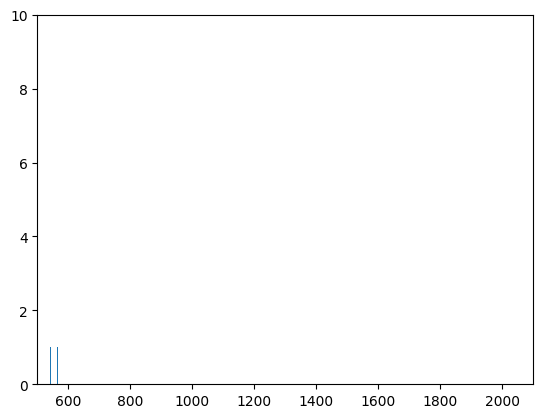

In [85]:
plt.hist(bkup2,bins=100)
plt.xlim(500,2100)
plt.ylim(0,10)

In [86]:
max(bkup2[1])

445

In [87]:
m, b = np.polyfit(medias, Producao, 1)
print(f"A relação entre preço e valor pode ser dada pela equação da reta: <p> = {m:.2f}v + {b:.2f}")

A relação entre preço e valor pode ser dada pela equação da reta: <p> = 0.48v + -16.41


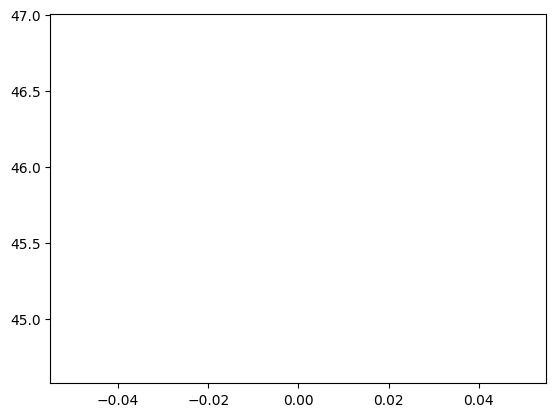

In [88]:
for x in range (L):
  plt.plot(tr_med[x])

In [89]:
13.96/5.42

2.5756457564575648

In [90]:
#%% Definindo l e c manualmente
Producao = np.array([0.001,4,6])
#Consumo  = np.array([0.04,16,12])
l=1/Producao
#c=1/Consumo
#print(c/l)
continuar=True
while(continuar):
    #l=np.random.random(L)                       #Incremente a cada passo na produção de cada mercadoria
    c=np.random.random(3)                       #Aumento de desejo a cada passo de cada mercadoria
    F=np.sum(c/l)                               #Calculando o fator de reescala
    c=c/F                                       #Obtendo o vetor c que respeite o somatório
    T=int(C*max(1/c))+1                         #Calculando o período pra troca de setor
    continuar = False if(max(1/c)<=R) else True #Vamos verificar se o tempo máximo de consumo é aceitável

Consumo  = 1/c                                  #Tempo necessário para consumir
Producao = 1/l                                  #Tempo necessário para produzir

print(Producao)
print(Consumo)

[1.e-03 4.e+00 6.e+00]
[ 1.66913437 11.98126378  9.01515055]


In [91]:
Producao = np.array([0.02,1,2,7])
Consumo  = np.array([1   ,2,10,25])
Producao/Consumo
sum(c/l)

np.float64(1.0)

In [92]:
2,50,24,24

(2, 50, 24, 24)